### Importing Python Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Importing Scikit-learn library For Model Development

    #### As we understand the business need which is asking to classify the customer whether the customer will subscribe the term deposit or not. And it is clear that this is a supervised-classification problem. Hence, we will be using Logistic Regression, KNN Classifier, & SVC to see which algorithm gives us the best preiction.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.svm import SVC

### Loading the Dataset

In [3]:
dataset = pd.read_csv('bank.csv', sep=';',index_col=False)

In [4]:
dataset.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

### Understanding the Data In & Out

In [5]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
dataset.size

76857

In [7]:
dataset.shape

(4521, 17)

In [8]:
dataset.sample(5)

age            job  marital  education default  balance housing loan  \
3068   43  self-employed  married   tertiary      no       64      no   no   
2794   44    blue-collar  married  secondary      no     1910     yes   no   
1614   40         admin.   single  secondary      no     2378     yes   no   
333    32       services  married    primary      no      228     yes   no   
4158   43    blue-collar  married    primary      no      483     yes   no   

       contact  day month  duration  campaign  pdays  previous poutcome    y  
3068   unknown    6   jun       230         2     -1         0  unknown   no  
2794   unknown    5   jun        41         1     -1         0  unknown   no  
1614   unknown    2   jun        65         1     -1         0  unknown   no  
333   cellular   21   jul      1017         6     -1         0  unknown  yes  
4158  cellular   12   may       225         3     -1         0  unknown   no

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
dataset.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

#### Checking if any row is having the duplicate datapoint

In [11]:
dataset.duplicated().sum()

0

#### Checking if the data has any missing values

In [12]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

+ Here we found no missing data in the dataset, hence we do not need to handle the missing data.

### Getting More insights via EDA

In [13]:
# dataset['age'].value_counts()

In [14]:
# dataset['age'].describe()

In [15]:
# sns.kdeplot(dataset['age'])

In [16]:
# dataset.info()

In [17]:
list_columns = ['age','balance','day','duration','campaign','pdays','previous']
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
# figure, axis = plt.subplots(3, 3)

# dataset['age'].plot.kde()
# # axis[0, 0].set_title("Sine Function")

In [19]:
# dataset['age'].plot.kde()

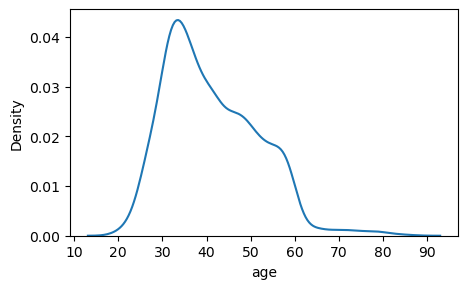

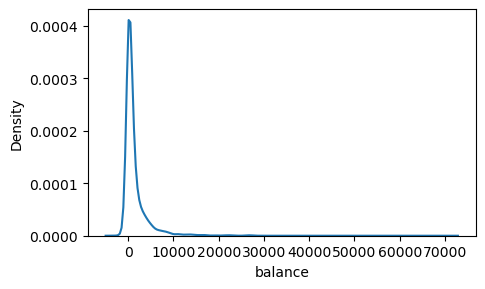

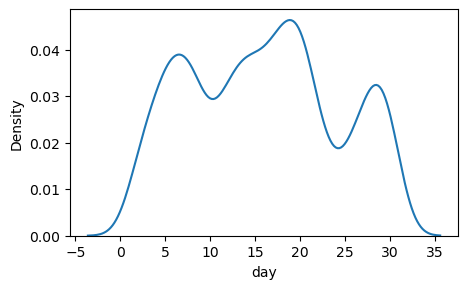

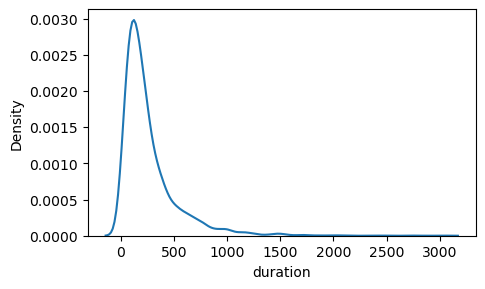

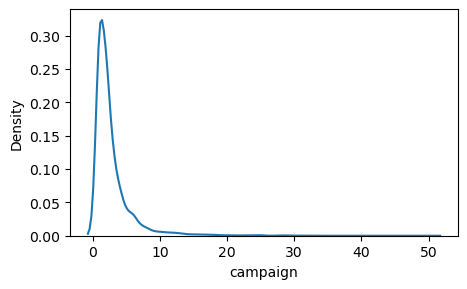

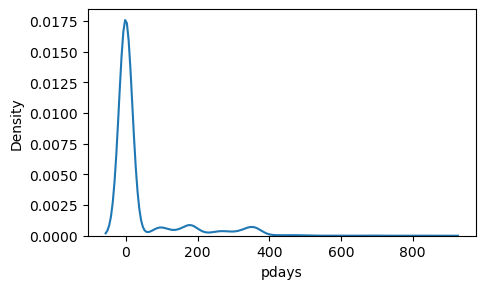

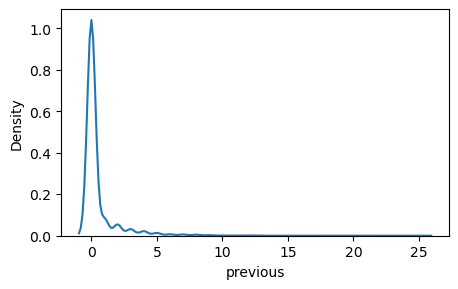

In [20]:
for i in list_columns:
    fig = plt.figure(figsize=(17,10))
    ax = plt.subplot(3,3,1)
    sns.kdeplot(dataset[i])


#### From the numeric columns visualisations we can see the following info:
 +  The Bank or organisatons target customers are in the age range of 21 to 60. This clarifies the customers mostly are in the phase of earning.
 + Most customers has the yearly avg balance upto 5000.
 + Most calls goes from the Bank end in the middle of the month.
 + On an average the call duration goes from 0 sec upto ~500 sec which is 4-5mins average call duration.
 + The average campaign i.e. number of contacts performed is ~5 / customer.

#### Visulalising the categorical data

In [21]:
# dataset.info()

In [22]:
list_categorical_columns = ['job','martial','education','default','housing','loan',
                           'contact','month','poutcome','y']

In [23]:
# job_details = dataset['job'].value_counts()

In [24]:
# print(job_details.values)
# print(job_details.index)

In [25]:
# plt.rcParams.update({'font.size': 15})

In [26]:
# fig = plt.figure(figsize=(14,8))
# ax = plt.subplot(111)
# sns.barplot(data=dataset,x=job_details.index, y=job_details.values)
# plt.xticks(rotation=70)
# plt.xlabel('Current Position of the customer')
# plt.ylabel('Number of people for each Job')

In [27]:
# plt.rcParams.update({'font.size': 12})

In [28]:
# maritial_details = dataset['marital'].value_counts()
# fig = plt.figure(figsize=(8,6))
# ax = plt.subplot(111)
# sns.barplot(data=dataset,x=maritial_details.index, y=maritial_details.values)
# plt.xlabel('Maritial Status of the customers')
# plt.ylabel('Total Number of customer of Each Maritial Type')

In [29]:
plt.rcParams.update({'font.size': 35})

In [30]:
#### Visuala

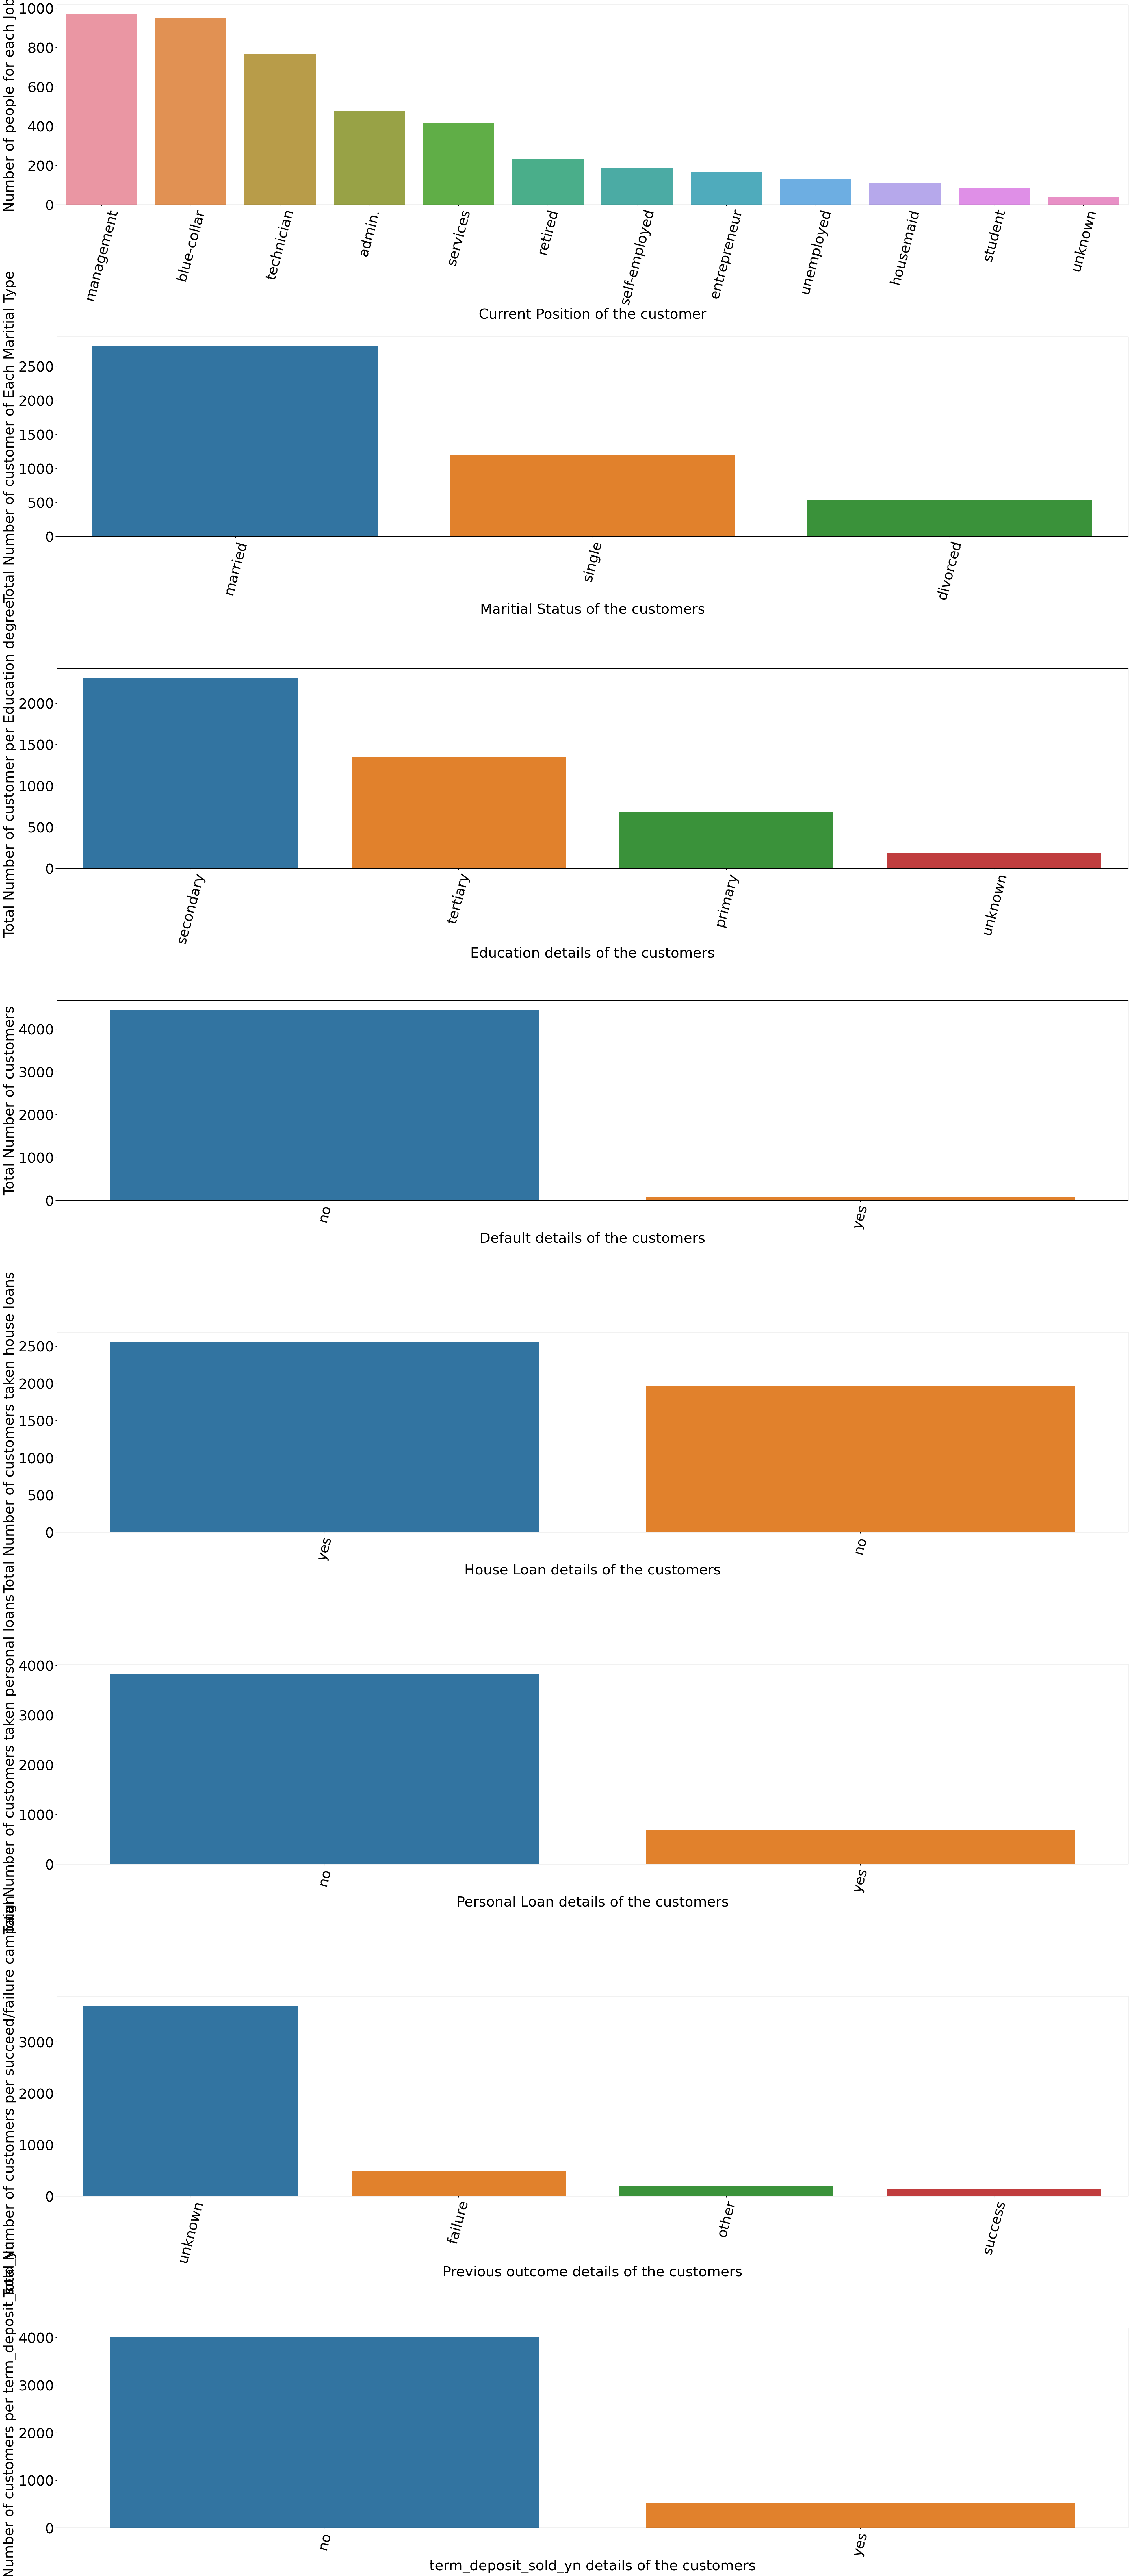

In [31]:
job_details = dataset['job'].value_counts()
maritial_details = dataset['marital'].value_counts()
education_details = dataset['education'].value_counts()
default_details = dataset['default'].value_counts()
housing_loan_details = dataset['housing'].value_counts()
personal_loan_details = dataset['loan'].value_counts()
previous_outcome = dataset['poutcome'].value_counts()
term_deposit_sold_yn = dataset['y'].value_counts()

fig = plt.figure(figsize=(40,90))

ax = plt.subplot(811)
sns.barplot(data=dataset,x=job_details.index, y=job_details.values)
plt.xlabel('Current Position of the customer')
plt.ylabel('Number of people for each Job')
plt.xticks(rotation=75)

ax = plt.subplot(812)
sns.barplot(data=dataset,x=maritial_details.index, y=maritial_details.values)
plt.xlabel('Maritial Status of the customers')
plt.ylabel('Total Number of customer of Each Maritial Type')
plt.xticks(rotation=75)

ax = plt.subplot(813)
sns.barplot(data=dataset,x=education_details.index, y=education_details.values)
plt.xlabel('Education details of the customers')
plt.ylabel('Total Number of customer per Education degree')
plt.xticks(rotation=75)

ax = plt.subplot(814)
sns.barplot(data=dataset,x=default_details.index, y=default_details.values)
plt.xlabel('Default details of the customers')
plt.ylabel('Total Number of customers')
plt.xticks(rotation=75)

ax = plt.subplot(815)
sns.barplot(data=dataset,x=housing_loan_details.index, y=housing_loan_details.values)
plt.xlabel('House Loan details of the customers')
plt.ylabel('Total Number of customers taken house loans')
plt.xticks(rotation=75)

ax = plt.subplot(816)
sns.barplot(data=dataset,x=personal_loan_details.index, y=personal_loan_details.values)
plt.xlabel('Personal Loan details of the customers')
plt.ylabel('Total Number of customers taken personal loans')
plt.xticks(rotation=75)

ax = plt.subplot(817)
sns.barplot(data=dataset,x=previous_outcome.index, y=previous_outcome.values)
plt.xlabel('Previous outcome details of the customers')
plt.ylabel('Total Number of customers per succeed/failure campaign')
plt.xticks(rotation=75)

ax = plt.subplot(818)
sns.barplot(data=dataset,x=term_deposit_sold_yn.index, y=term_deposit_sold_yn.values)
plt.xlabel('term_deposit_sold_yn details of the customers')
plt.ylabel('Total Number of customers per term_deposit_sold_yn')
plt.xticks(rotation=75)

plt.tight_layout()

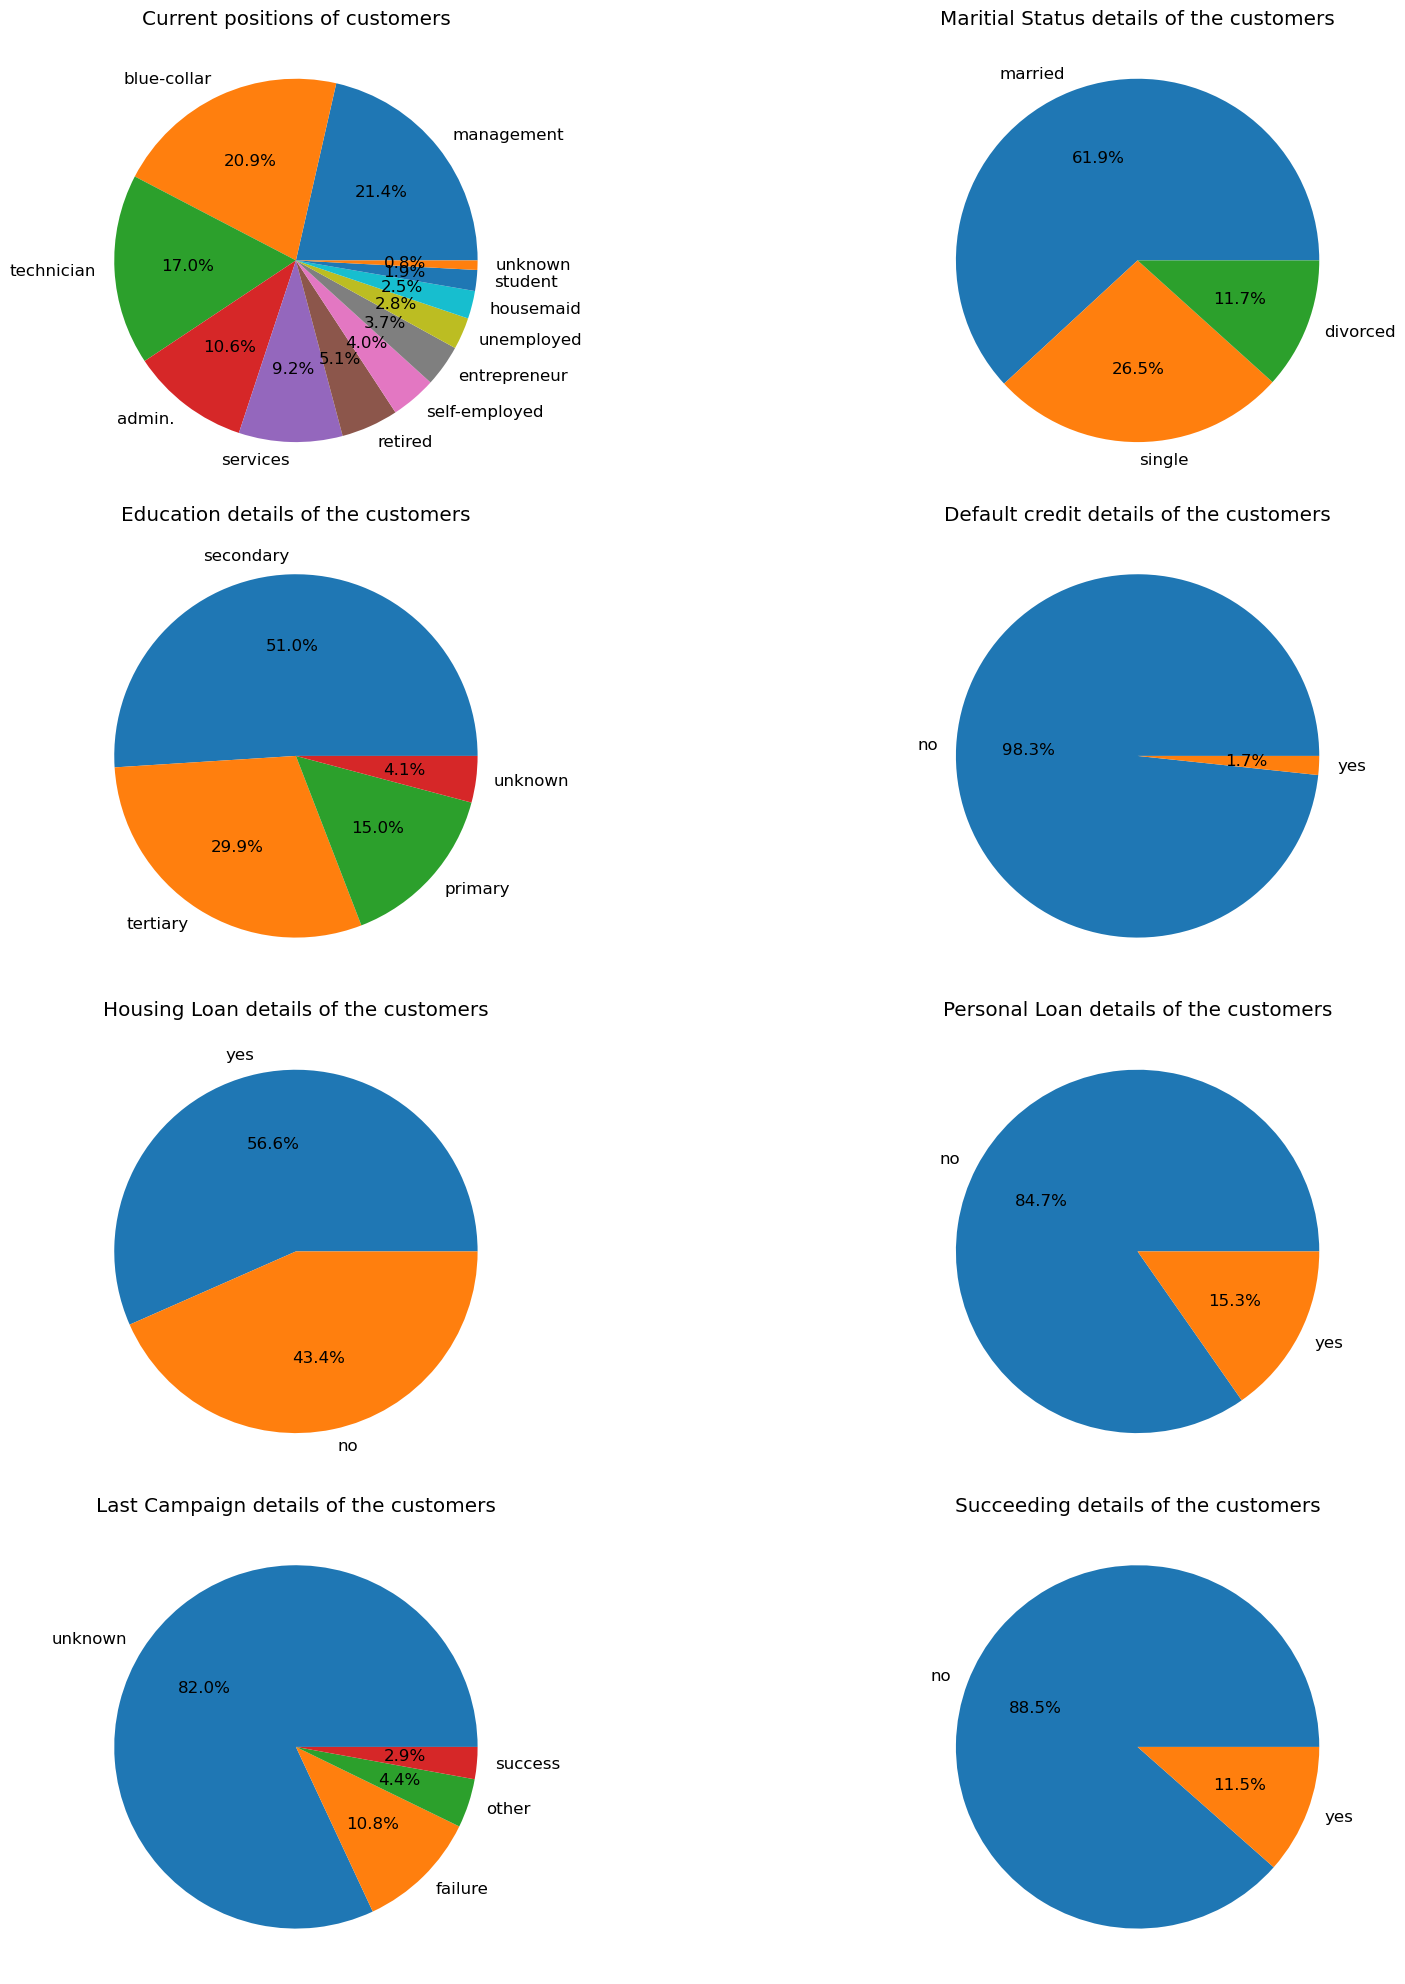

In [32]:
plt.rcParams.update({'font.size': 12})
job_details = dataset['job'].value_counts()
maritial_details = dataset['marital'].value_counts()
education_details = dataset['education'].value_counts()
default_details = dataset['default'].value_counts()
housing_loan_details = dataset['housing'].value_counts()
personal_loan_details = dataset['loan'].value_counts()
previous_outcome = dataset['poutcome'].value_counts()
term_deposit_sold_yn = dataset['y'].value_counts()

fig = plt.figure(figsize=(20,20))

ax = plt.subplot(421)
plt.pie(labels=job_details.index, x=job_details.values, autopct='%0.1f%%')
plt.title('Current positions of customers')

ax = plt.subplot(422)
plt.pie(labels=maritial_details.index, x=maritial_details.values, autopct='%0.1f%%')
plt.title('Maritial Status details of the customers')

ax = plt.subplot(423)
plt.pie(labels=education_details.index, x=education_details.values, autopct='%0.1f%%')
plt.title('Education details of the customers')

ax = plt.subplot(424)
plt.pie(labels=default_details.index, x=default_details.values, autopct='%0.1f%%')
plt.title('Default credit details of the customers')

ax = plt.subplot(425)
plt.pie(labels=housing_loan_details.index, x=housing_loan_details.values, autopct='%0.1f%%')
plt.title('Housing Loan details of the customers')

ax = plt.subplot(426)
plt.pie(labels=personal_loan_details.index, x=personal_loan_details.values, autopct='%0.1f%%')
plt.title('Personal Loan details of the customers')

ax = plt.subplot(427)
plt.pie(labels=previous_outcome.index, x=previous_outcome.values, autopct='%0.1f%%')
plt.title('Last Campaign details of the customers')

ax = plt.subplot(428)
plt.pie(labels=term_deposit_sold_yn.index, x=term_deposit_sold_yn.values, autopct='%0.1f%%')
plt.title('Succeeding details of the customers')

plt.tight_layout()

#### From the above categorical data visualisation we found the followings:
+ The Bank/Org. targets customers who are in management/senior level role.
+ Most of the customers belongs to Married category.
+ We found out that the succeed rate for the last campaign happened for the respective customers is very low ~ 3%. Which in turn indicate the selling rate is very low ~11%.

#### Compairing each plot with other plot to see the relation between the features & target

In [33]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [34]:
# dataset[dataset['duration']==-1]

In [35]:
# plt.scatter(dataset['y'],dataset['duration'])

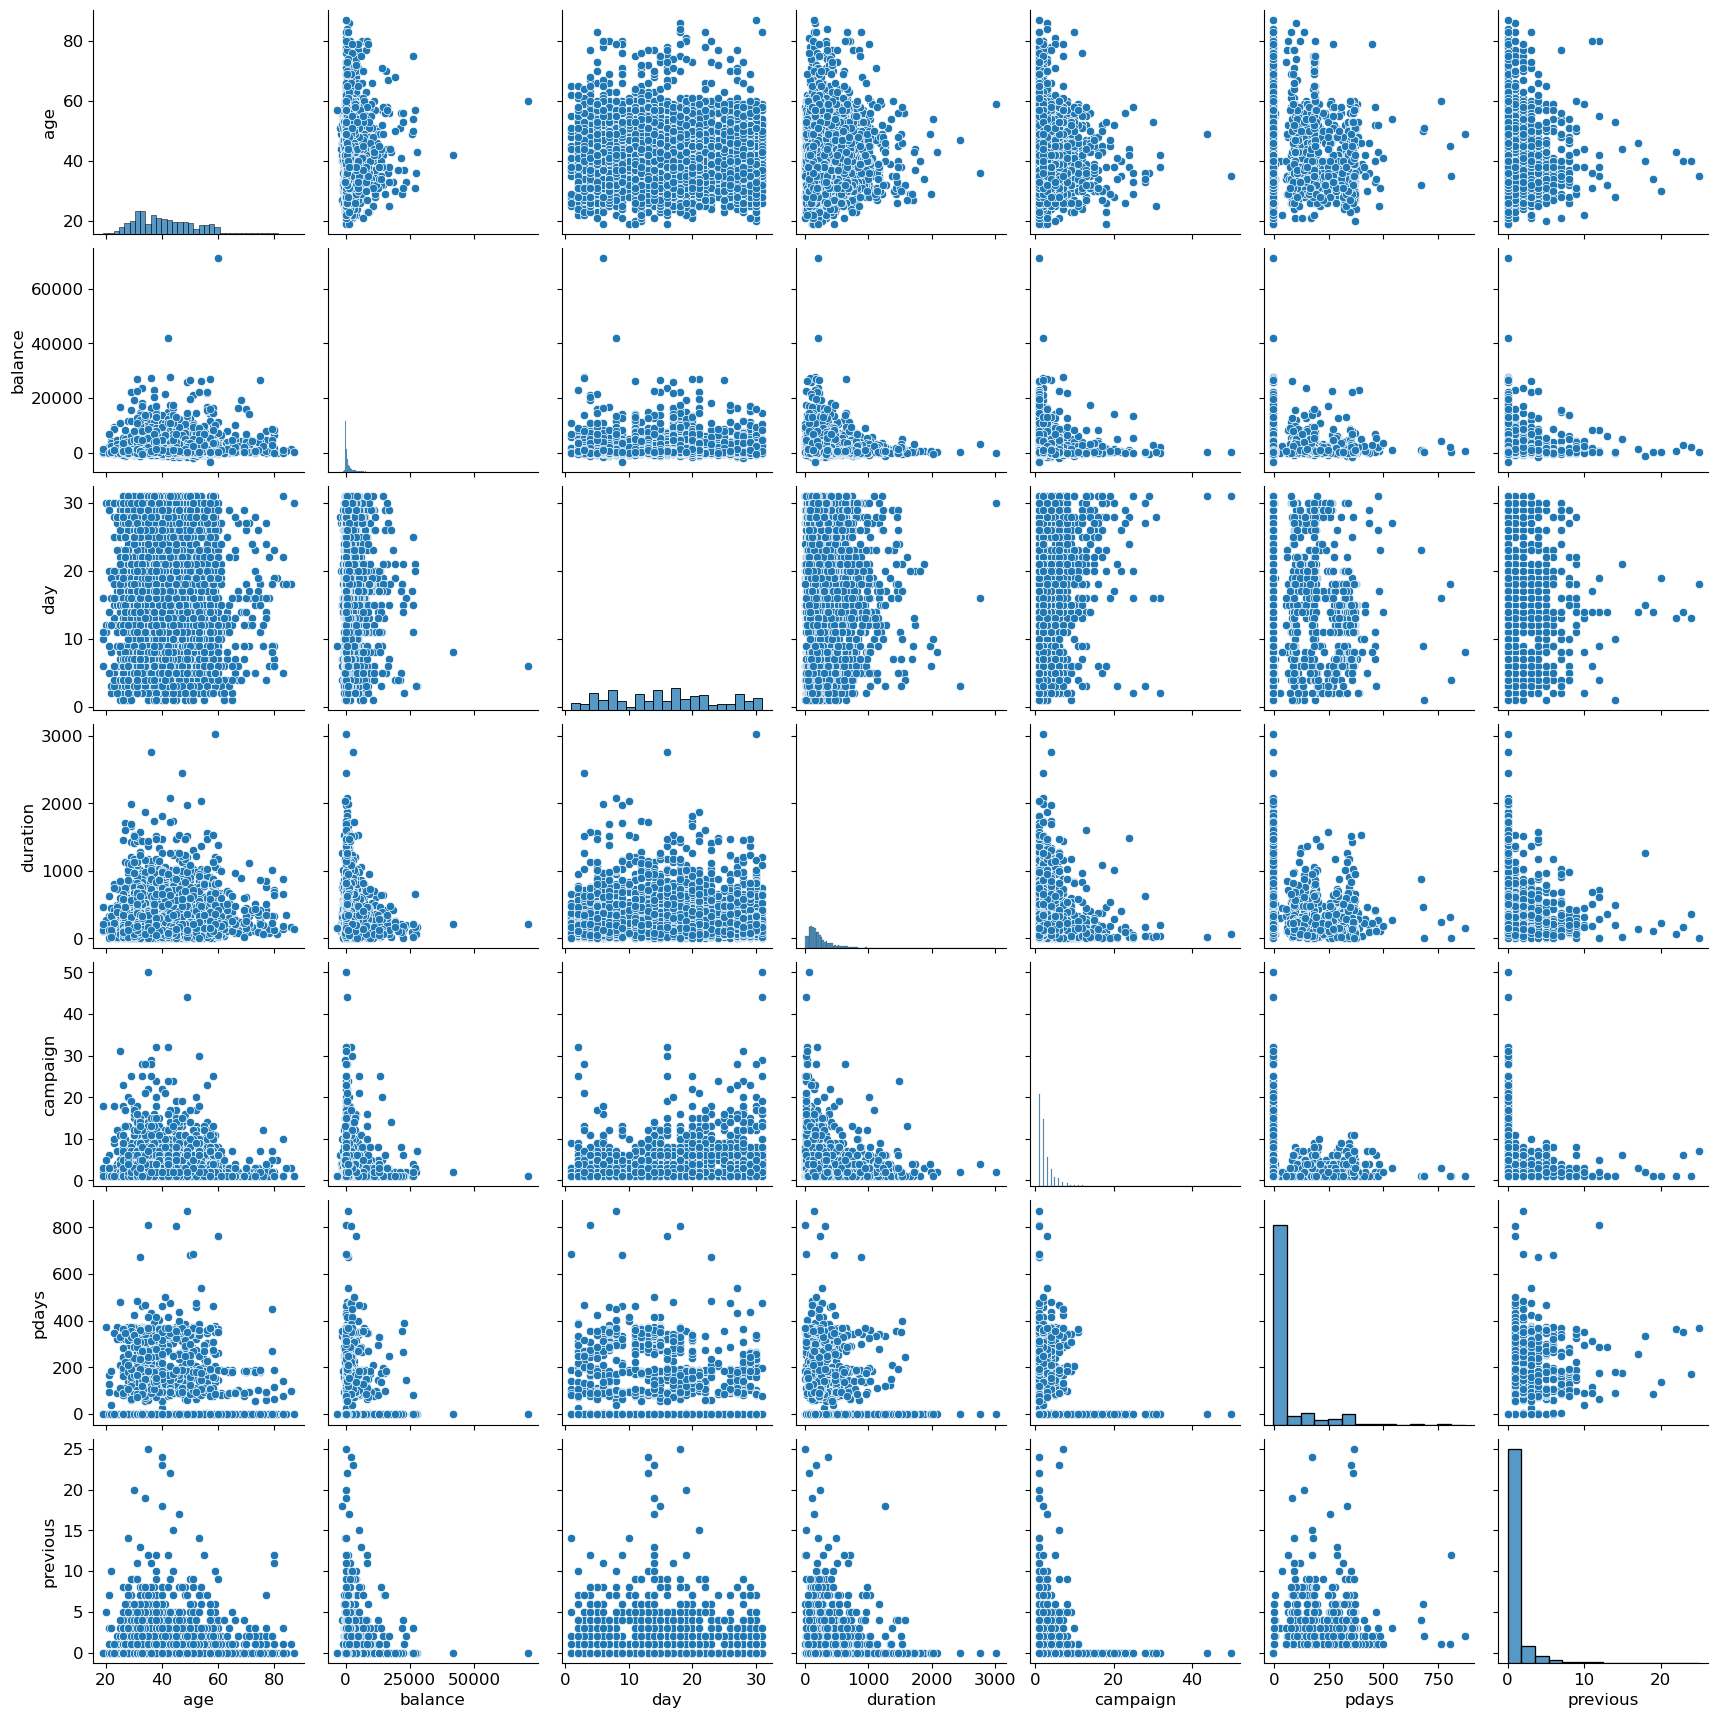

In [36]:
sns.pairplot(data=dataset)

### From the above visualisation the followings are found:
+ The duration of the call decreases when the frequency of the campaign increases.
+ From the balance v/s duration plot , it is clear that customer having less balance in the account are showing their interset in opening a term deposit.

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [38]:
dataset['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

### Visualising "Job" Fetaure v/s  Target "y"

#### Visualising the Job Feature

In [39]:
# dataset['job'].value_counts()
# job_name = dataset['job'].value_counts().index
# total_customer_working_on_the_same_domain = dataset['job'].value_counts().values

In [40]:
# fig = plt.figure(figsize=(12,8))
# ax = plt.subplot(111)
# sns.barplot(x=job_name,y=customer_working_on_the_same_domain)
# plt.xticks(rotation=75)

#### Visualising the Target Column

In [41]:
# dataset['y'].nunique()
# term_deposit_yes_no = dataset['y'].value_counts().values
# term_deposit_index = dataset['y'].value_counts().index

In [42]:
# fig = plt.figure(figsize=(6,6))
# ax = plt.subplot(111)
# sns.barplot(x=term_deposit_index,y=term_deposit_yes_no)

### Getting the datapoints where the Term Deposit were not sold

In [43]:
dataset_no = dataset[dataset['y']=='no']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'management'),
  Text(2, 0, 'technician'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'services'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'unemployed'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

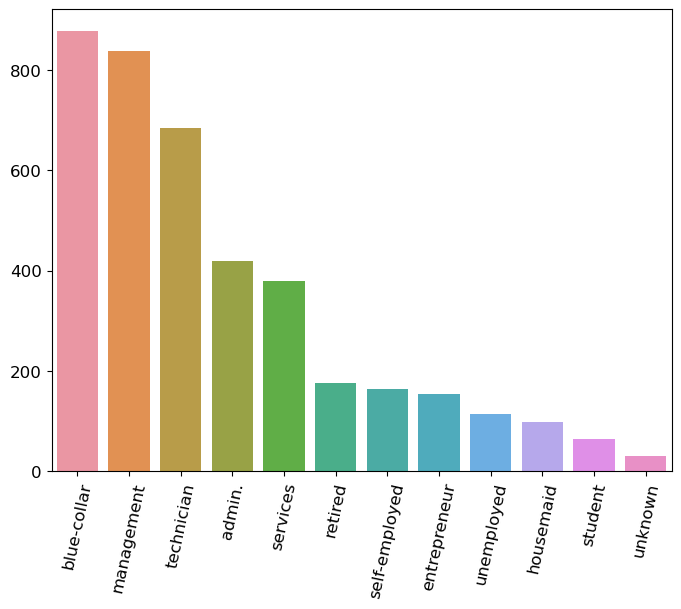

In [44]:
job_name_no = dataset_no['job'].value_counts().index
customer_working_on_the_same_domain_no = dataset_no['job'].value_counts().values

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
sns.barplot(x=job_name_no,y=customer_working_on_the_same_domain_no)
plt.xticks(rotation=78)

### Getting the datapoints where the Term Deposit were sold

In [45]:
dataset_yes = dataset[dataset['y']=='yes']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'blue-collar'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'services'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'student'),
  Text(8, 0, 'entrepreneur'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

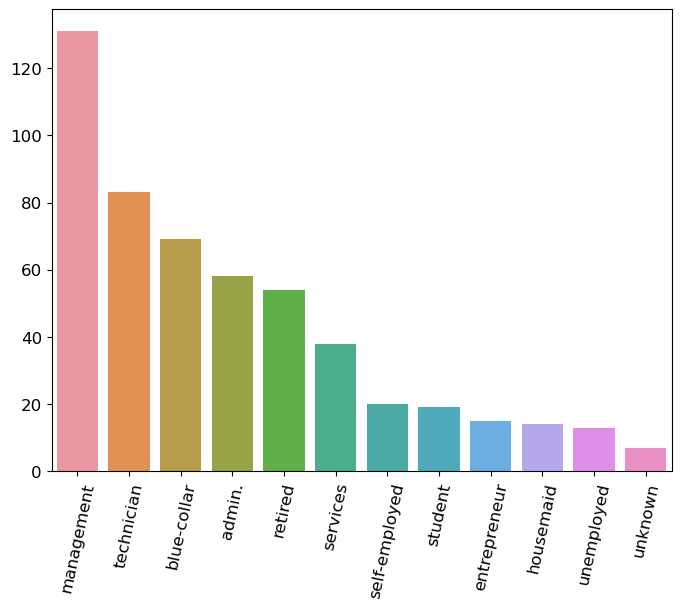

In [46]:
job_name_yes = dataset_yes['job'].value_counts().index
customer_working_on_the_same_domain_yes = dataset_yes['job'].value_counts().values

fig = plt.figure(figsize=(8,6))

ax = plt.subplot(111)
sns.barplot(x=job_name_yes,y=customer_working_on_the_same_domain_yes)
plt.xticks(rotation=78)

### Visualising the Term Deposit sold rate with respect to the Occupation/Job

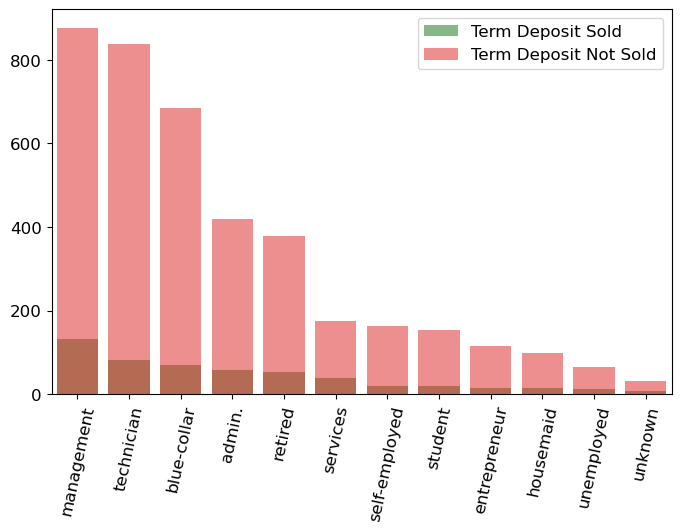

In [47]:
job_name_yes = dataset_yes['job'].value_counts().index
customer_working_on_the_same_domain_yes = dataset_yes['job'].value_counts().values

fig = plt.figure(figsize=(8,5))

### Drawing the "yes" plot
index = []
for i in range(1,len(job_name_yes)+1):
    index.append(i)

ax = plt.subplot(111)
sns.barplot(x=index,y=customer_working_on_the_same_domain_yes, color='green', alpha=0.5, label='Term Deposit Sold')

### Drawing the "No" Plot
index2=[]
for i in range(1,len(job_name_no)+1):
    index2.append(i+0.75)

sns.barplot(x=index2,y=customer_working_on_the_same_domain_no, color='red', alpha=0.5, label='Term Deposit Not Sold')

arr = np.array(job_name_yes)
ax.set_xticklabels(arr)
plt.xticks(rotation=78)
plt.legend(loc='upper right')

### Education Comparison of Both Yes & No class of Target Column

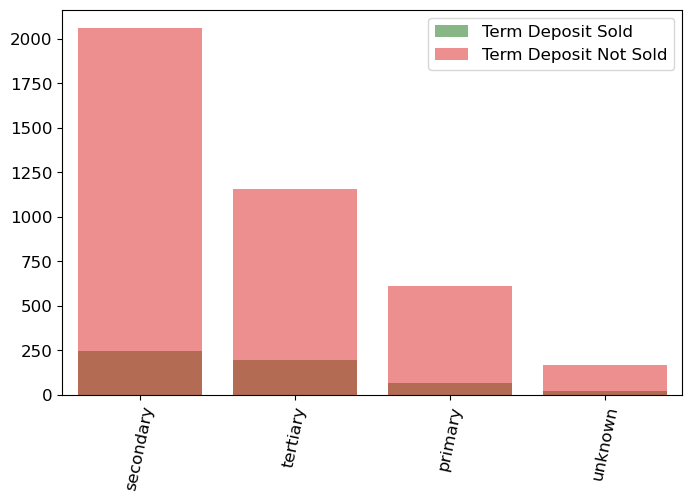

In [48]:
education_name_yes = dataset_yes['education'].value_counts().index
total_customer_for_each_education_yes = dataset_yes['education'].value_counts().values
total_customer_for_each_education_no = dataset_no['education'].value_counts().values

# print(education_name_yes, total_customer_for_each_education_yes, total_customer_for_each_education_no)

fig = plt.figure(figsize=(8,5))

### Drawing the "yes" plot
index = []
for i in range(1,len(education_name_yes)+1):
    index.append(i)

ax = plt.subplot(111)
sns.barplot(x=index,y=total_customer_for_each_education_yes, color='green', alpha=0.5, label='Term Deposit Sold')

### Drawing the "No" Plot
index2=[]
for i in range(1,len(education_name_yes)+1):
    index2.append(i+0.75)

sns.barplot(x=index2,y=total_customer_for_each_education_no, color='red', alpha=0.5, label='Term Deposit Not Sold')

arr = np.array(education_name_yes)
ax.set_xticklabels(arr)
plt.xticks(rotation=78)
plt.legend(loc='upper right')

#### from the above plots we can see the followings:
+ Customers belonging to the Management buying the Term Deposit.
+ Customer educated till Secondary buying little bit more term deposit in comparison to tertiary level of education customers 

#### martial vs y

### Correlation of each column with every column & Visualising with the HeatMap
+ Correlation shows up the relaton between two columns i.e. how strongly they are correlated.

In [49]:
correlation = dataset.corr()

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_62340/3698212406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


<Axes: >

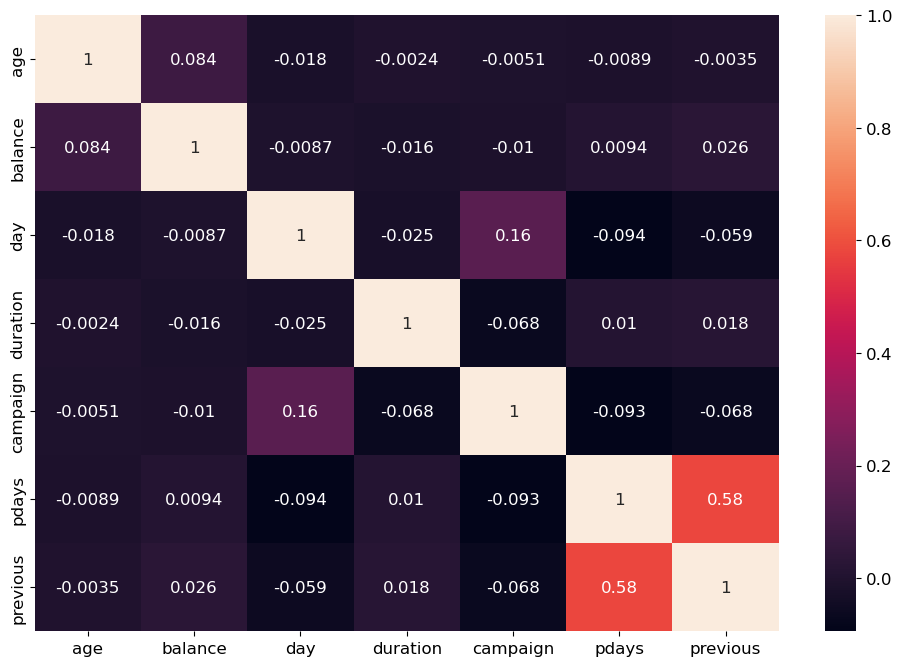

In [50]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True)

#### From the heatmap we can see that the "pdays" & "previous" is mild correlated.

### Feature Engineering

#### 1) Checking for the Missing data

In [51]:
dataset.sample(10)

age          job   marital  education default  balance housing loan  \
1358   41   technician   married  secondary      no        0      no   no   
4370   57  blue-collar   married    primary      no     5431     yes  yes   
2440   49   technician  divorced   tertiary      no        0     yes   no   
3470   34   technician    single  secondary      no        0     yes  yes   
3253   39  blue-collar   married    unknown      no      157     yes   no   
3727   34   technician    single  secondary      no      475     yes   no   
1452   55   technician   married  secondary      no      955     yes   no   
3012   36     services   married  secondary      no      -11     yes   no   
2602   25  blue-collar   married    primary     yes     -589     yes   no   
2863   31   management    single   tertiary      no      385     yes   no   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
1358  cellular   11   mar       101         1     -1         0  unknown  no  
4370   unknown    6   may       383         1     -1         0  unknown  no  
2440  cellular   12   jun       177         3     -1         0  unknown  no  
3470   unknown   16   may       214         1     -1         0  unknown  no  
3253   unknown   30   may        99         6     -1         0  unknown  no  
3727  cellular   29   jul       538         8     -1         0  unknown  no  
1452  cellular   29   jan       104         1     -1         0  unknown  no  
3012  cellular   30   jul       172        28     -1         0  unknown  no  
2602   unknown    3   jun       233         1     -1         0  unknown  no  
2863   unknown   21   may       304         1     -1         0  unknown  no

In [52]:
dataset.shape

(4521, 17)

In [53]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### 2) Handling the Categorical Data 

In [54]:
info = dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### NB
+ As we can see we have 10 categorical Data.
+ We all know that in Machine Learning we have to feed the data in terms of numbers. Hence, we will now handle all the Categorical Features & convert them into the numeric numbers.

In [55]:
Categorical_columns = ['job','martial','education','default','housing','loan','contact',
                       'month','poutcome']
target_column = ['y']

In [56]:
dataset['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [57]:
dataset['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [58]:
dataset['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [59]:
dataset['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [60]:
dataset['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [61]:
dataset['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [62]:
dataset['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [63]:
dataset['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [64]:
dataset['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [65]:
type(dataset)

pandas.core.frame.DataFrame

+ <b>  From all the Categorical Columns. We can say that "education" column rest all the features will come under "Nominal" Categorical data. "education" column will come under the "Ordinal" Categorical data.
    
    
 + <b> To all the Nominal Categorical data we will apply One Hot Encoding to encode to number and to all the Ordinal Categorical data we will apply Ordinal Encoder technique to convert the object to number.

In [66]:
##### Optional ####

In [67]:
# X = dataset.iloc[0:,0:-1]
# y = dataset.iloc[0:,-1]

In [68]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
# trans_obj = ColumnTransformer(transformers=[('tf1',OrdinalEncoder(categories=[['primary','secondary','tertiary','unknown']]),['education']),
#                                                      ('tf2',OneHotEncoder(sparse_output=False,drop='first'),['job','marital','default','housing','loan', 'contact', 'month','poutcome']),
#                                            ('tf3', LabelEncoder(),['y'])],
#                                        remainder='passthrough')

In [70]:
# X_train.shape

In [71]:
# y_train.shape

In [72]:
# trans_obj.fit(X=X_train,y=y_train)

In [73]:
##### Optional Ends here #####

In [74]:
transformer_object = ColumnTransformer(transformers=[('tf1',OrdinalEncoder(categories=[['primary','secondary','tertiary','unknown']]),['education']),
                                                     ('tf2',OneHotEncoder(sparse_output=False,drop='first'),['job','marital','default','housing','loan', 'contact', 'month','poutcome'])],
                                       remainder='passthrough')

In [75]:
transformer_object.fit(dataset)

ColumnTransformer(remainder='passthrough',
                  transformers=[('tf1',
                                 OrdinalEncoder(categories=[['primary',
                                                             'secondary',
                                                             'tertiary',
                                                             'unknown']]),
                                 ['education']),
                                ('tf2',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'contact', 'month', 'poutcome'])])

In [76]:
transformed_dataset = transformer_object.transform(dataset)

In [77]:
transformed_dataset

array([[0.0, 0.0, 0.0, ..., -1, 0, 'no'],
       [1.0, 0.0, 0.0, ..., 339, 4, 'no'],
       [2.0, 0.0, 0.0, ..., 330, 1, 'no'],
       ...,
       [1.0, 0.0, 0.0, ..., -1, 0, 'no'],
       [1.0, 1.0, 0.0, ..., 211, 3, 'no'],
       [2.0, 0.0, 1.0, ..., 249, 7, 'no']], dtype=object)

In [78]:
transformed_dataset.shape

(4521, 41)

In [79]:
dataset.shape

(4521, 17)

In [80]:
type(transformed_dataset)

numpy.ndarray

In [81]:
transformed_dataset[0:,-1]

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

### Encoding the Target column / Labels

In [82]:
label = LabelEncoder()

In [83]:
label.fit(transformed_dataset[0:,-1])

LabelEncoder()

In [84]:
transformed_labels = label.transform(transformed_dataset[0:,-1])

In [85]:
transformed_labels

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
transformed_dataset2 = transformed_dataset.copy()

### Label Outcome : 0 means "no" & 1 means "yes"

### Patching the Encoded Labels with the updated transformed dataset

In [87]:
transformed_dataset2[0:,-1] = transformed_labels

In [88]:
transformed_dataset2

array([[0.0, 0.0, 0.0, ..., -1, 0, 0],
       [1.0, 0.0, 0.0, ..., 339, 4, 0],
       [2.0, 0.0, 0.0, ..., 330, 1, 0],
       ...,
       [1.0, 0.0, 0.0, ..., -1, 0, 0],
       [1.0, 1.0, 0.0, ..., 211, 3, 0],
       [2.0, 0.0, 1.0, ..., 249, 7, 0]], dtype=object)

In [89]:
transformed_dataset2.shape

(4521, 41)

### Now our data is prepared for train test split

In [90]:
X = transformed_dataset2[0:,0:-1]
y = transformed_dataset2[0:,-1]

In [91]:
X

array([[0.0, 0.0, 0.0, ..., 1, -1, 0],
       [1.0, 0.0, 0.0, ..., 1, 339, 4],
       [2.0, 0.0, 0.0, ..., 1, 330, 1],
       ...,
       [1.0, 0.0, 0.0, ..., 11, -1, 0],
       [1.0, 1.0, 0.0, ..., 4, 211, 3],
       [2.0, 0.0, 1.0, ..., 2, 249, 7]], dtype=object)

In [92]:
X.shape

(4521, 40)

In [93]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [94]:
y.shape

(4521,)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X_train

array([[2.0, 0.0, 1.0, ..., 1, -1, 0],
       [2.0, 0.0, 0.0, ..., 5, -1, 0],
       [1.0, 0.0, 0.0, ..., 2, -1, 0],
       ...,
       [2.0, 0.0, 0.0, ..., 4, 366, 2],
       [2.0, 0.0, 0.0, ..., 4, -1, 0],
       [0.0, 1.0, 0.0, ..., 2, -1, 0]], dtype=object)

In [97]:
X_train.shape

(3616, 40)

In [98]:
X_test.shape

(905, 40)

In [99]:
X_test

array([[1.0, 0.0, 1.0, ..., 6, -1, 0],
       [2.0, 0.0, 0.0, ..., 2, 2, 5],
       [1.0, 0.0, 0.0, ..., 3, -1, 0],
       ...,
       [1.0, 0.0, 0.0, ..., 1, -1, 0],
       [1.0, 0.0, 0.0, ..., 1, -1, 0],
       [1.0, 0.0, 0.0, ..., 2, -1, 0]], dtype=object)

In [100]:
# y_train

In [101]:
# y_test

In [102]:
pd.DataFrame(X_train).iloc[0:,27:]

27   28   29   30   31   32  33    34  35   36 37   38 39
0     1.0  0.0  0.0  0.0  0.0  1.0  34   262  20  371  1   -1  0
1     0.0  0.0  0.0  0.0  0.0  1.0  32  2349  14  134  5   -1  0
2     0.0  0.0  0.0  0.0  0.0  1.0  34  1076   8   70  2   -1  0
3     0.0  0.0  0.0  0.0  0.0  1.0  31   156  13  657  7   -1  0
4     0.0  0.0  0.0  0.0  0.0  1.0  46   258  27  217  1   -1  0
...   ...  ...  ...  ...  ...  ...  ..   ...  ..  ... ..  ... ..
3611  0.0  0.0  0.0  0.0  0.0  1.0  41  1536   4   54  2   -1  0
3612  0.0  0.0  0.0  0.0  0.0  1.0  34  -370  21  748  1   -1  0
3613  0.0  0.0  0.0  0.0  0.0  0.0  46   523   6  105  4  366  2
3614  0.0  0.0  0.0  0.0  0.0  1.0  47   440  21   71  4   -1  0
3615  0.0  0.0  0.0  0.0  0.0  1.0  58   309  19  156  2   -1  0

[3616 rows x 13 columns]

### Standardizing the Data i.e. bringing all the features into a uniform scale, so that algorithm will learn in a better way.

In [103]:
scaler = StandardScaler()

In [104]:
scaler.fit(X_train)

StandardScaler()

In [105]:
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

#### Now are ready with the data.
+ As a next step we have to determine which algoritm to choose for Prediction

+ Let's see how our data looks like, if it is linearly spearable or not.

In [106]:
import plotly.express as px

+ To visualise the data in 3-Dimension we have to reduce the dimensionality of the data.
+ We will use PCA i.e. Principle Component Analysis to reduce the dimensionality.

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=3)

In [109]:
pca.fit(X)

PCA(n_components=3)

In [110]:
X_trans = pca.transform(X)

In [111]:
dummy_df = pd.DataFrame(X_trans, columns=['feature1','feature2','feature3'])

In [112]:
# dummy_df

In [113]:
dummy_df['target'] = y

In [114]:
dummy_df

feature1    feature2    feature3 target
0      364.582255 -184.648869  -40.009182      0
1     3366.491409  -37.862201  298.421972      0
2      -72.458755  -77.675277  290.623333      0
3       53.416458  -65.071359  -40.367428      0
4    -1422.610958  -40.117567  -40.058867      0
...           ...         ...         ...    ...
4516 -1755.761802   62.397536  -40.623453      0
4517 -4735.506847 -117.711417  -38.676235      0
4518 -1127.508205 -114.727126  -39.931294      0
4519  -285.420072 -134.531206  172.067455      0
4520  -286.702955   81.649714  209.084215      0

[4521 rows x 4 columns]

In [115]:
fig = px.scatter_3d(data_frame=dummy_df,x=dummy_df['feature1'],y=dummy_df['feature2'],
              z=dummy_df['feature3'], color=dummy_df['target'])
fig.show()

### From the plot the data points looks a sort of linearly separable. Hence, I would like to first give a shot with Logistic Regression.

In [116]:
X_train_transformed.dtype

dtype('float64')

In [117]:
X_test_transformed.dtype

dtype('float64')

### As the datasetis pretty big ~4k , I am keeping the solver as "saga"

In [118]:
logistic_classifier = LogisticRegression(max_iter=100, solver='saga') 

In [119]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [120]:
logistic_classifier.fit(X_train_transformed,y_train)

LogisticRegression(solver='saga')

In [121]:
logistic_classifier.classes_

array([0., 1.])

In [122]:
logistic_classifier.coef_

array([[ 0.02203963, -0.18137356, -0.14115491, -0.03390227,  0.06371929,
         0.12115544, -0.00710279, -0.06167989,  0.04383653, -0.05848737,
        -0.06332314,  0.01717834, -0.21830523, -0.09902146,  0.09889613,
        -0.14029199, -0.21700201, -0.05596976, -0.61328916, -0.18559224,
        -0.0067085 ,  0.01116158, -0.19673235, -0.29929592,  0.10954262,
         0.13536393, -0.35418205, -0.25321222,  0.15268436,  0.06573269,
         0.16598834,  0.42503264, -0.0327942 ,  0.0054919 , -0.00708879,
         0.12250197,  1.1092861 , -0.22066306, -0.09043552,  0.00785636]])

In [123]:
logistic_classifier.intercept_

array([-2.83372837])

In [124]:
logistic_classifier.verbose

0

In [125]:
y_prediction = logistic_classifier.predict(X_test_transformed)

In [126]:
accuracy_score(y_test,y_prediction)

0.901657458563536

In [127]:
f1_score(y_test,y_prediction)

0.3945578231292517

In [128]:
from sklearn.metrics import precision_score, recall_score

In [129]:
precision_score(y_test, y_prediction)

0.5918367346938775

In [130]:
recall_score(y_test,y_prediction)

0.29591836734693877

In [131]:
confusion_matrix(y_test,y_prediction)

array([[787,  20],
       [ 69,  29]])

In [132]:
dataset['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [133]:
y_test_series = pd.Series(y_test)

In [134]:
y_test_series.value_counts()

0.0    807
1.0     98
dtype: int64

### We can see that the test data is fully in balanced in order to calculate the accuracy score. Hence, we are getting the F1 score as ~0.4. 

#### Now we will test with the seen data i.e. train data. Let's evaluate our model with the train dataset

In [135]:
train_prediction = logistic_classifier.predict(X_train)
print("accuracy score", accuracy_score(y_train,train_prediction))
print("F1 score", f1_score(y_train, train_prediction))
print("Precision Score", precision_score(y_train,train_prediction))
print("Recall Score",recall_score(y_train,train_prediction))

accuracy score 0.13744469026548672
F1 score 0.21296997224325007
Precision Score 0.1192090395480226
Recall Score 0.9976359338061466


In [136]:
y_train_df = pd.DataFrame(y_train)

In [137]:
y_train_df.value_counts()

0.0    3193
1.0     423
dtype: int64

### It is very clear that the dataset is very much inbalanced. As a result we are getting very low accuracy of the model

In [138]:
# pip install threadpoolctl==3.2.0

### Let's give a try with KNN Algorithm, as we know KNN gives better results with the Inabalanced dataset

In [139]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [140]:
knn_classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [141]:
knn_classifier.classes_

array([0., 1.])

In [142]:
knn_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [143]:
knn_classifier.n_features_in_

40

In [144]:
knn_classifier.weights

'uniform'

In [145]:
y_prediction_knn = knn_classifier.predict(X_test_transformed)

In [146]:
accuracy_score(y_test,y_prediction_knn)

0.8883977900552487

In [147]:
f1_score(y_test,y_prediction_knn)

0.2627737226277373

In [148]:
confusion_matrix(y_test,y_prediction_knn)

array([[786,  21],
       [ 80,  18]])

### Let's see how SVM works here with the inbalanced Dataset

In [149]:
svc_classifier = SVC()

In [150]:
svc_classifier.fit(X_train_transformed,y_train)

SVC()

In [151]:
y_prediction_svc = svc_classifier.predict(X_test_transformed)

In [152]:
accuracy_score(y_test,y_prediction_svc)

0.8994475138121547

In [153]:
f1_score(y_test,y_prediction_svc)

0.3157894736842105

In [154]:
confusion_matrix(y_test,y_prediction_svc)

array([[793,  14],
       [ 77,  21]])

In [155]:
X_train[100,0:]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 24, -46, 19, 23, 1, -1, 0],
      dtype=object)

### As we can see for all the three algorithm our F1 score is not going beyond ~0.4. And the reason is inbalanced dataset i.e. the "yes" class has a very less number of data points as a result none of the algorithm is able to convergent with 100% confidence, which leads to misclassification of the classes especially for the "yes" class.

### For Now I will choose Logistic Regressor to classify my data points as the F1 score is ~0.4(with highest number of correct predictions as well), which is highest among all the three algorithms.

### Export the Logistic Regression Model

In [156]:
pickle.dump(logistic_classifier, open('Term_Deposit_Subscription_Predictor.pkl', 'wb'))

In [157]:
model_load = pickle.load(open('Term_Deposit_Subscription_Predictor.pkl', 'rb'))

### Exporting the Standard Scaler Object

In [158]:
pickle.dump(scaler,open('Standard_Scaler.pkl','wb'))

### Exporting the Encoder Object as Pkl file

In [159]:
pickle.dump(transformer_object, open('Transformer.pkl','wb'))

### Exporting the Label Encoder Object as pkl file

In [160]:
pickle.dump(label, open('Label_Encoder.pkl','wb'))

### Send the Query to the Model

In [161]:
model_load.predict([X_test_transformed[0,0:]])

array([0.])

In [162]:
y_test[0]

0.0